In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [110]:
#df = pd.read_csv('../data/sample submission.csv')
df = pd.read_csv('../data/data.csv', sep=';', encoding='latin1')
print(df)

          Id     Category   Manufacturer     Model  Prod. year Gear box type  \
0       2680         Jeep        HYUNDAI        H1        2014     Automatic   
1       5960        Sedan     MITSUBISHI    Mirage        2002     Automatic   
2       2185         Jeep        HYUNDAI  Santa FE        2014     Automatic   
3      15905        Sedan  MERCEDES-BENZ     E 260        1992        Manual   
4      15337    Universal          HONDA       FIT        2015     Automatic   
...      ...          ...            ...       ...         ...           ...   
16346  19198         Jeep         TOYOTA     RAV 4        2015     Automatic   
16347   3583        Sedan         TOYOTA     Prius        2009     Automatic   
16348  18497         Jeep      SSANGYONG    REXTON        2015     Automatic   
16349   4565  Goods wagon           OPEL     Combo        2011        Manual   
16350  11586        Sedan           FORD    Fusion        2013     Automatic   

      Leather interior Fuel type Engine

# DATOS FALTANTES

In [111]:
# verificar datos faltantes
for col in df.columns.to_list():
  calc = (df[col].isna().sum()/df.shape[0])*100
  print(f'{col} missing Values: {calc}%')

Id missing Values: 0.0%
Category missing Values: 0.0%
Manufacturer missing Values: 0.0%
Model missing Values: 0.0%
Prod. year missing Values: 0.0%
Gear box type missing Values: 0.0%
Leather interior missing Values: 0.0%
Fuel type missing Values: 0.0%
Engine volume missing Values: 0.0%
Drive wheels missing Values: 0.0%
Cylinders missing Values: 0.0%
Mileage missing Values: 0.0%
Doors missing Values: 0.0%
Airbags missing Values: 0.0%
Wheel missing Values: 0.0%
Color missing Values: 0.0%
Sales Fee missing Values: 0.0%
price missing Values: 0.0%


# VARIABLES CATEGÓRICAS

## ENCODING

In [112]:
def label_encoding(dataset, column_name):
    label_encoder = LabelEncoder()
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name])
    return dataset, label_encoder

def frequency_encoding(dataset, col):
    freq = dataset[col].value_counts(normalize=True)
    dataset[col] = dataset[col].map(freq)
    return dataset, freq

In [113]:
df2 = df
def to_zero(n):
  if n == '-': return 0
  return n

def mileage_km(n):
  return n.replace(' km', '')

def turbo(n):
  if 'Turbo' in n: return 1
  return 0

def engine_volume(n):
  return n.replace(' Turbo', '')

def doors(n):
  if n == '>5': return 6
  return n


df2['Turbo'] = df2['Engine volume'].map(turbo)

In [114]:

df2['Sales Fee'] = df2['Sales Fee'].map(to_zero)
df2['Mileage'] = df2['Mileage'].map(mileage_km)
df2['Engine volume'] = df2['Engine volume'].map(engine_volume)
df2['Doors'] = df2['Doors'].map(doors)

df2.head(20)

,Id,Category,Manufacturer,Model,Prod. year,Gear box type,Leather interior,Fuel type,Engine volume,Drive wheels,Cylinders,Mileage,Doors,Airbags,Wheel,Color,Sales Fee,price,Turbo
0,2680,Jeep,HYUNDAI,H1,2014,Automatic,Yes,Diesel,2.5,Front,4,74210,4,4,Left wheel,Silver,777,22433,0
1,5960,Sedan,MITSUBISHI,Mirage,2002,Automatic,No,Petrol,1.8,Front,4,160000,4,2,Left wheel,White,0,7500,0
2,2185,Jeep,HYUNDAI,Santa FE,2014,Automatic,Yes,Diesel,2,Front,4,51106,4,4,Left wheel,White,639,27284,0
3,15905,Sedan,MERCEDES-BENZ,E 260,1992,Manual,No,CNG,2.6,Rear,6,0,4,4,Left wheel,Beige,0,3450,0
4,15337,Universal,HONDA,FIT,2015,Automatic,Yes,Hybrid,1.5,Front,4,35624,4,4,Left wheel,Black,308,26644,0
5,13792,Hatchback,HONDA,FIT,2014,Automatic,Yes,Petrol,1.5,Front,4,78000,4,4,Left wheel,White,501,25638,0
6,12015,Microbus,FORD,Transit,2007,Manual,No,Diesel,2.4,Rear,4,165000,4,2,Left wheel,Blue,0,17249,0
7,307,Sedan,TOYOTA,Camry,2015,Automatic,Yes,Hybrid,2.5,Front,4,35000,4,10,Left wheel,Grey,456,39201,0
8,1054,Sedan,TOYOTA,Camry,2012,Automatic,Yes,Hybrid,2.5,Front,4,156518,4,12,Left wheel,White,781,3607,0
9,7945,Sedan,HYUNDAI,Elantra,2012,Automatic,Yes,Petrol,1.6,Front,4,165294,4,4,Left wheel,Silver,531,16308,0


In [115]:
df2, freq_category = frequency_encoding(df2, 'Category')
df2, freq_manufacturer = frequency_encoding(df2, 'Manufacturer')
df2, freq_model = frequency_encoding(df2, 'Model')
# Prod. Year
df2, freq_gear_box_type = frequency_encoding(df2, 'Gear box type')
df2, label_leather_interior = label_encoding(df2, 'Leather interior')
df2, freq_fuel_type = frequency_encoding(df2, 'Fuel type')
# Engine volume: quitar el turbo y crear variable aparte
df2, freq_drive_wheels = frequency_encoding(df2, 'Drive wheels')
# Cylinders
df2, freq_mileage = frequency_encoding(df2, 'Mileage') # quitar km
# Doors: cambiar >5 por 4
# Airbags
df2, freq_wheel = frequency_encoding(df2, 'Wheel')
df2, freq_color = frequency_encoding(df2, 'Color')
# Sales Fee: cambiar '-' por '0'
df2.head()

,Id,Category,Manufacturer,Model,Prod. year,Gear box type,Leather interior,Fuel type,Engine volume,Drive wheels,Cylinders,Mileage,Doors,Airbags,Wheel,Color,Sales Fee,price,Turbo
0,2680,0.287567,0.196869,0.022567,2014,0.702832,1,0.211363,2.5,0.670907,4,0.000061,4,4,0.922512,0.195951,777,22433,0
1,5960,0.453183,0.015106,0.000428,2002,0.702832,0,0.528286,1.8,0.670907,4,0.006483,4,2,0.922512,0.233380,0,7500,0
2,2185,0.287567,0.196869,0.027521,2014,0.702832,1,0.211363,2,0.670907,4,0.000122,4,4,0.922512,0.233380,639,27284,0
3,15905,0.453183,0.105315,0.000061,1992,0.096875,0,0.024524,2.6,0.118097,6,0.036817,4,4,0.922512,0.006850,0,3450,0
4,15337,0.018592,0.050028,0.022690,2015,0.702832,1,0.185065,1.5,0.670907,4,0.000061,4,4,0.922512,0.261941,308,26644,0


# OUTLIERS

In [116]:
for col in df2.columns:
    df2[col] = pd.to_numeric(df[col])

In [117]:
# Tratar con outliers
def cuantificaOutliers(dataset):
  for col in dataset.columns:
    q1, q3 = np.percentile(dataset[col],[25,75])
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outlier = dataset[(dataset[col]<lower_bound)|(dataset[col]>upper_bound)]
    print(col, ' ', outlier.shape[0], ' ', outlier.shape[0]/dataset.shape[0]*100, '%')

cuantificaOutliers(df2)

Id   0   0.0 %
Category   0   0.0 %
Manufacturer   0   0.0 %
Model   0   0.0 %
Prod. year   824   5.039447128615987 %
Gear box type   0   0.0 %
Leather interior   0   0.0 %
Fuel type   0   0.0 %
Engine volume   1184   7.241147330438505 %
Drive wheels   0   0.0 %
Cylinders   4140   25.31955232095896 %
Mileage   2015   12.323405296312153 %
Doors   763   4.666381261084949 %
Airbags   0   0.0 %
Wheel   1267   7.7487615436364745 %
Color   0   0.0 %
Sales Fee   136   0.831753409577396 %
price   901   5.510366338450248 %
Turbo   1618   9.89541924041343 %


# ANÁLISIS DE CORRELACIÓN

<Axes: >

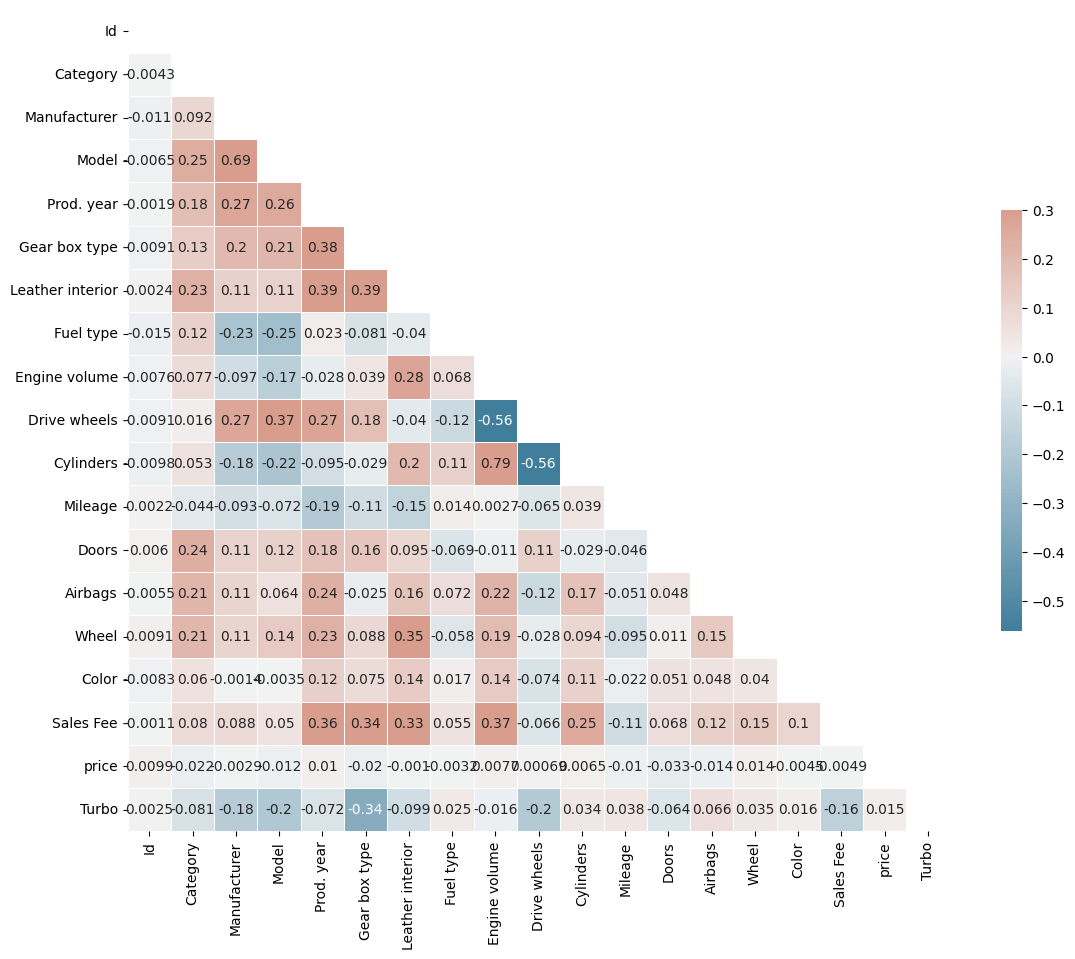

In [118]:
# Realizar un análisis de correlación
corr = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.tight_layout()
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':0.5}, annot=True)

In [119]:
correlations = df2.corr()['price'].abs().sort_values(ascending=False)
print("Correlación con la variable objetivo (Curado):\n", correlations)

Correlación con la variable objetivo (Curado):
 price               1.000000
Doors               0.032986
Category            0.021632
Gear box type       0.020325
Turbo               0.015388
Wheel               0.013929
Airbags             0.013830
Model               0.012108
Mileage             0.010075
Prod. year          0.010010
Id                  0.009915
Engine volume       0.007680
Cylinders           0.006525
Sales Fee           0.004929
Color               0.004539
Fuel type           0.003239
Manufacturer        0.002938
Leather interior    0.000998
Drive wheels        0.000685
Name: price, dtype: float64


# VARIABLES

In [120]:
df3 = df2
df3 = df3.drop('Model', axis=1)
df3 = df3.drop('Engine volume', axis=1)
df3 = df3.drop('Cylinders', axis=1)
df3 = df3.drop('Sales Fee', axis=1)
df3 = df3.drop('Color', axis=1)
df3 = df3.drop('Mileage', axis=1)
df3 = df3.drop('Fuel type', axis=1)
df3 = df3.drop('Manufacturer', axis=1)
df3 = df3.drop('Leather interior', axis=1)
df3 = df3.drop('Drive wheels', axis=1)
df3.head()

,Id,Category,Prod. year,Gear box type,Doors,Airbags,Wheel,price,Turbo
0,2680,0.287567,2014,0.702832,4,4,0.922512,22433,0
1,5960,0.453183,2002,0.702832,4,2,0.922512,7500,0
2,2185,0.287567,2014,0.702832,4,4,0.922512,27284,0
3,15905,0.453183,1992,0.096875,4,4,0.922512,3450,0
4,15337,0.018592,2015,0.702832,4,4,0.922512,26644,0


In [121]:
df4 = df3
y = df4['price']
x = df4.drop('price', axis=1)

# MODELO

In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)
model = LogisticRegression(max_iter=100)
model.fit(x_train,y_train)
yhat = model.predict(x_test)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# EVALUACIÓN

In [123]:
print('Accuracy: ', metrics.accuracy_score(y_test,yhat))

Accuracy:  0.015410958904109588


# OUTPUT FILE

In [124]:

df_eval = pd.read_csv('../data/Evaluation.csv', sep=';', encoding='latin1')

df_eval['Turbo'] = df_eval['Engine volume'].map(turbo)

df_eval['Sales Fee'] = df_eval['Sales Fee'].map(to_zero)
df_eval['Mileage'] = df_eval['Mileage'].map(mileage_km)
df_eval['Engine volume'] = df_eval['Engine volume'].map(engine_volume)
df_eval['Doors'] = df_eval['Doors'].map(doors)

df_eval['Category'] = df_eval['Category'].map(freq_category).fillna(0)
df_eval['Manufacturer'] = df_eval['Manufacturer'].map(freq_manufacturer)
df_eval['Model'] = df_eval['Model'].map(freq_model)
df_eval['Gear box type'] = df_eval['Gear box type'].map(freq_gear_box_type)
df_eval['Leather interior'] = label_leather_interior.transform(df_eval['Leather interior'])
df_eval['Fuel type'] = df_eval['Fuel type'].map(freq_fuel_type)
df_eval['Drive wheels'] = df_eval['Drive wheels'].map(freq_drive_wheels)
df_eval['Mileage'] = df_eval['Mileage'].map(freq_mileage)
df_eval['Wheel'] = df_eval['Wheel'].map(freq_wheel)
df_eval['Color'] = df_eval['Color'].map(freq_color)

df_eval = df_eval.drop('Model', axis=1)
df_eval = df_eval.drop('Engine volume', axis=1)
df_eval = df_eval.drop('Cylinders', axis=1)
df_eval = df_eval.drop('Sales Fee', axis=1)
df_eval = df_eval.drop('Color', axis=1)
df_eval = df_eval.drop('Mileage', axis=1)
df_eval = df_eval.drop('Fuel type', axis=1)
df_eval = df_eval.drop('Manufacturer', axis=1)
df_eval = df_eval.drop('Leather interior', axis=1)
df_eval = df_eval.drop('Drive wheels', axis=1)

print(df_eval)

         Id  Category  Prod. year  Gear box type Doors  Airbags     Wheel  \
0     15246  0.453183        2014       0.702832     4        6  0.922512   
1      5176  0.453183        2013       0.702832     4       12  0.922512   
2      3143  0.287567        2009       0.702832     4        4  0.922512   
3      3360  0.287567        2011       0.096875     2        2  0.922512   
4      3105  0.027093        2013       0.702832     4       12  0.922512   
...     ...       ...         ...            ...   ...      ...       ...   
2881  17665  0.453183        2009       0.702832     4       12  0.922512   
2882   6554  0.287567        2015       0.702832     4       12  0.922512   
2883  18661  0.453183        2014       0.702832     4        0  0.077488   
2884   6825  0.453183        2014       0.702832     4        4  0.922512   
2885  11266  0.015779        1996       0.096875     4        2  0.922512   

      Turbo  
0         0  
1         0  
2         0  
3         0  
4    

In [125]:
output = model.predict(df_eval)
id_column = df_eval['Id']

predicted_df = pd.DataFrame({
    'id': id_column,
    'price': output
})

print(predicted_df)

         id  price
0     15246    470
1      5176  15681
2      3143  15681
3      3360  15681
4      3105  15681
...     ...    ...
2881  17665  14113
2882   6554  15681
2883  18661  14113
2884   6825  15681
2885  11266  15681

[2886 rows x 2 columns]


In [126]:
predicted_df.to_csv('../results/01/01.csv', index=False)

In [127]:
import pickle

# Guardar el modelo
with open('../models/01_modelo_entrenado.pkl', 'wb') as file:
    pickle.dump(model, file)